### Assignment 3: Calculating Routes

Continuing from the outcome of the previous assignment, we want to calculate different types of information based on the routes of users. The column trip_id denotes locations that a certain user has gone through. As such, a unique user (i.e ID=1) has gone through different locations. To do the calculations for this, we will need to use the trip_id column of the data set ***sweden_points.shp*** that we created at the last step of Assignment 2.

Answer the following questions:

- What was the shortest distance a user travelled between all their posts (in meters)?

- What was the mean distance travelled per user (in meters)?

- What was the maximum distance a user travelled (in meters)?

1) First, import the shapefile  and transform it into a projected system (SWEREF99, EPSG:3006)

         lat        lon  ID                                      OLD_geom  \
0  59.751286  21.149547   1   POINT (21.14954727276289 59.75128564941775)   
1  65.258818  21.154727   1   POINT (21.15472668615925 65.25881798502805)   
2  61.744069  21.413240   1  POINT (21.413240388392545 61.74406920192757)   
3  58.834489  23.026573   1  POINT (23.026572762151275 58.83448938216252)   
4  61.308422  17.221379   1   POINT (17.221379411521763 61.3084223226109)   

                         geometry  
0  POINT (845251.385 6639741.461)  
1  POINT (787065.581 7251321.099)  
2   POINT (838331.424 6862373.84)  
3  POINT (962649.249 6549421.782)  
4  POINT (618962.437 6799164.947)  


<Axes: >

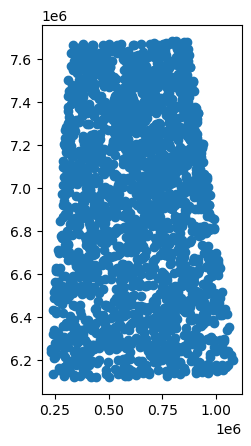

In [3]:
# Libraries
import pandas as pd
import geopandas as gpd
import pathlib
import geopandas
import shapely.geometry
from shapely.geometry import LineString

# File Path
NOTEBOOK_PATH = pathlib.Path().resolve()
sweden_points = geopandas.read_file(NOTEBOOK_PATH / "gdf_Lab2_2.shp")

# Conversion to EPSG 3006 
sweden_points_epsg_3006 = sweden_points.to_crs("EPSG:3006")
sweden_points_epsg_3006.set_geometry('geometry', inplace=True)

# Rename old column and keep new column
sweden_points_epsg_3006 = sweden_points_epsg_3006.rename(columns={'Geometry': 'OLD_geom'})
sweden_points_epsg_3006 = sweden_points_epsg_3006.rename(columns={'Trip_ID': 'ID'})
print(sweden_points_epsg_3006.head())
sweden_points_epsg_3006.plot()

 2) Following, group the data by user id.

In [44]:
# Aim of theis expercise: One Line String per Group 

3) Create ***shapely.geometry.LineString*** objects for each user. There are multiple ways to solve this problem (see the hints for this exercise). You can use, for instance, a dictionary or an empty GeoDataFrame to collect data that is generated using the steps below:

- Use a for-loop to iterate over the grouped object.
- For each user’s data: create a shapely.geometry.LineString based on the user’s points.
- Store the results in a geopandas.GeoDataFrame called ***movements***, and remember to assign a CRS.


In [26]:
# Group by ID
gid = sweden_points_epsg_3006.groupby("ID")

# Empty lsit
dtf = []

# Iterate over each group and apply the logic for creating LineStrings
for trip_id, group in sweden_points_epsg_3006.groupby("ID"):
    
    # Apply LineString Fucntion to every grouped values (Here it means points)
    line = LineString(list(group.geometry.values))
    
    # Append both ID and the line created to a the new lsit created
    dtf.append({"ID": trip_id, "geometry": line})
      
# Convert the empty list into a Geopandas dataframe with CRS:
movements = gpd.GeoDataFrame(dtf, columns= ["ID", "geometry"], crs="3006")

   ID                                           geometry
0   1  LINESTRING (845251.385 6639741.461, 787065.581...
1   2  LINESTRING (864817.489 7485650.624, 767119.119...
2   3  LINESTRING (452270.534 7026609.03, 652926.75 7...
3   4  LINESTRING (918262.273 6191596.14, 853824.92 7...
4   5  LINESTRING (406319.008 6193535.446, 669999.747...


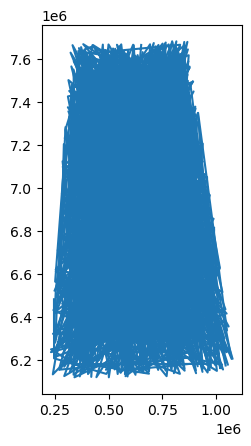

In [27]:
# Check the result
movements.plot()
print(movements.head())

4) Calculate the distance between all locations of a user.
Compute the lengths of the lines, and store it in a new column called ***distance***.


In [32]:
# Get length fucntion
def get_length(line_input):
    lng = line_input.length
    return lng

# for loop
for i, row in movements.iterrows():    # name of dataframe 
    disx = get_length(row["geometry"])    # the get_length fucntion loop over rows in column "geometry"
    movements.at[i, "distance"] = disx    # New Column called "distance", then target of appending is disx
    
print(movements)
movements.crs
    

    ID                                           geometry      distance
0    1  LINESTRING (845251.385 6639741.461, 787065.581...  3.304152e+07
1    2  LINESTRING (864817.489 7485650.624, 767119.119...  2.639079e+07
2    3  LINESTRING (452270.534 7026609.03, 652926.75 7...  3.163838e+07
3    4  LINESTRING (918262.273 6191596.14, 853824.92 7...  2.759891e+07
4    5  LINESTRING (406319.008 6193535.446, 669999.747...  3.132166e+07
5    6  LINESTRING (966973.138 6514858.527, 426029.297...  3.026283e+07
6    7  LINESTRING (806962.817 6925486.491, 543438.924...  2.993462e+07
7    8  LINESTRING (667214.562 7008754.9, 536436.32 62...  3.107355e+07
8    9  LINESTRING (622718.839 6724494.857, 669984.5 6...  2.808132e+07
9   10  LINESTRING (741474.29 6931668.458, 595414.005 ...  3.469605e+07
10  11  LINESTRING (591552.745 7044792.183, 646071.349...  2.765100e+07
11  12  LINESTRING (539989.456 6814004.651, 460278.21 ...  2.948071e+07
12  13  LINESTRING (638427.242 6400629.14, 721987.27 6...  2.573

<Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich



5) What was the shortest distance a user travelled between all their posts (in meters)? (store the value in a variable shortest_distance)
 
   What was the mean distance travelled per user (in meters)? (store the value in a variable mean_distance)

   What was the maximum distance a user travelled (in meters)? (store the value in a variable longest_distance)

In [40]:
# Shortest distance traveled by each user
shortest_distance = movements["distance"].min()
# Mean distance traveled by each user
mean_distance = movements["distance"].min()
# Longest distance traveled by each user
longest_distance = movements["distance"].max()

print(f"The shortest distance is {shortest_distance} m. ")
print(f"The mean distance is {mean_distance} m. ")
print(f"The longest distance is {longest_distance} m. ")

The shortest distance is 25239410.46773694 m. 
The mean distance is 25239410.46773694 m. 
The longest distance is 34696053.56543146 m. 


Great work! Upload the Jupyter Notebook files on Canvas!

25239410.46773694
